# K-Nearest Neighbour Algorithm (Used for Classification and Regression)

##### KNN Nearest Neighbour Solve Classification Problem

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
dataset = pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\TShirt_size.csv')
dataset.head(3)

,Height (in cms),Weight (in kgs),T Shirt Size
0,156,65,M
1,161,61,M
2,167,63,L


In [28]:
dataset.isnull().sum()

Height (in cms)    0
Weight (in kgs)    0
T Shirt Size       0
dtype: int64

In [29]:
dataset.describe()

,Height (in cms),Weight (in kgs)
count,1000.000000,1000.000000
mean,163.379000,61.753000
std,4.557645,3.303771
min,155.000000,55.000000
25%,159.000000,59.000000
50%,163.000000,62.000000
75%,167.000000,64.000000
max,174.000000,72.000000


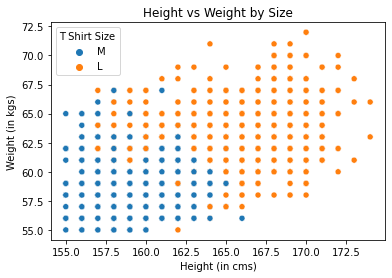

In [30]:
sns.scatterplot(x='Height (in cms)', y='Weight (in kgs)', data=dataset, hue='T Shirt Size')
plt.title('Height vs Weight by Size')
plt.show()

In [31]:
x =dataset.iloc[:, :-1]
y = dataset['T Shirt Size']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i,p=1)
    knn.fit(x_train, y_train)
    print(f'Accuracy for k={i}  :{knn.score(x_train,y_train)} {knn.score(x_test, y_test)}')


Accuracy for k=1  :0.90875 0.785
Accuracy for k=2  :0.90125 0.815
Accuracy for k=3  :0.9175 0.825
Accuracy for k=4  :0.91375 0.84
Accuracy for k=5  :0.92125 0.84
Accuracy for k=6  :0.91875 0.83
Accuracy for k=7  :0.91875 0.84
Accuracy for k=8  :0.91875 0.83
Accuracy for k=9  :0.91375 0.84
Accuracy for k=10  :0.9175 0.83
Accuracy for k=11  :0.91125 0.84
Accuracy for k=12  :0.9075 0.85
Accuracy for k=13  :0.9075 0.855
Accuracy for k=14  :0.90875 0.85
Accuracy for k=15  :0.9075 0.855
Accuracy for k=16  :0.90875 0.845
Accuracy for k=17  :0.9075 0.845
Accuracy for k=18  :0.90375 0.865
Accuracy for k=19  :0.90625 0.855


In [37]:
knn = KNeighborsClassifier(n_neighbors=18,p=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=18, p=1)

In [38]:
print(f"Train Score :{knn.score(x_train, y_train)}")
print(f"Test Score :{knn.score(x_test, y_test)}")

Train Score :0.90375
Test Score :0.865


In [43]:
knn.predict([[156,65]]) #156	65	M

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['M'], dtype=object)

In [44]:
knn.predict([[167,61]]) # 167	61	L

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['L'], dtype=object)

In [50]:
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions

# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Retrain the classifier with encoded labels
knn_encoded = KNeighborsClassifier(n_neighbors=18, p=1)
knn_encoded.fit(x, y_encoded)


KNeighborsClassifier(n_neighbors=18, p=1)

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


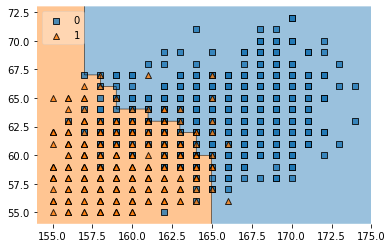

In [51]:
# Plot decision regions
plot_decision_regions(x.to_numpy(), y_encoded, clf=knn_encoded, legend=2)
plt.show()

##### KNN Nearest Neighbour Solve Regression Problem

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [204]:
dataset = pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\Medical_Checkup_Charges.csv')
dataset.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [205]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [206]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


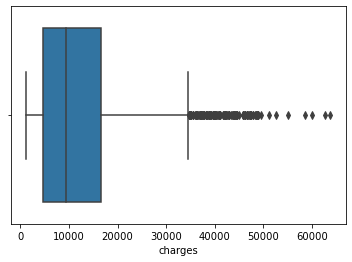

In [207]:
sns.boxplot(x='charges', data=dataset)
plt.show()

In [208]:
q1 = dataset['charges'].quantile(0.25)
q3 = dataset['charges'].quantile(0.75)
iqr = q3 - q1
mini = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr

mini, max

(-13109.1508975, 34489.350562499996)

In [209]:
dataset = dataset[(dataset['charges'] >= mini) & (dataset['charges'] <= max)]

In [210]:
dataset.describe()

,age,bmi,children,charges
count,1199.000000,1199.000000,1199.000000,1199.000000
mean,38.989992,30.095200,1.084237,9927.753402
std,14.068040,6.010551,1.214304,7241.158309
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4408.695900
50%,39.000000,29.735000,1.000000,8410.046850
75%,51.000000,33.820000,2.000000,12953.594600
max,64.000000,53.130000,5.000000,34472.841000


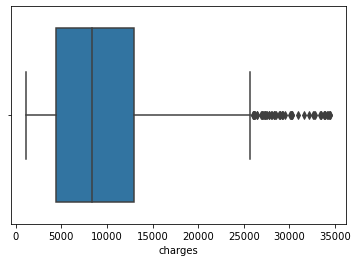

In [211]:
sns.boxplot(x='charges', data=dataset)
plt.show()

In [212]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [213]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [214]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [215]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first')
encoded_features=encoder.fit_transform(dataset[['sex','smoker']]).toarray()
encoded_features = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
print(encoded_features.columns)

Index(['sex_male', 'smoker_yes'], dtype='object')


In [216]:
encoded_features.rename(columns={   
    'sex_male':'sex',
    'smoker_yes':'smoker',
},inplace=True)
print(encoded_features.head())

   sex  smoker
0  0.0     1.0
1  1.0     0.0
2  1.0     0.0
3  1.0     0.0
4  1.0     0.0


In [217]:
# Drop only if columns exist
columns_to_drop = [col for col in ['sex','smoker'] if col in dataset.columns]
dataset = dataset.drop(columns=columns_to_drop, axis=1)
dataset = pd.concat([dataset, encoded_features], axis=1)
dataset.head(5)

,age,bmi,children,region,charges,sex,smoker
0,19.0,27.900,0.0,southwest,16884.92400,0.0,1.0
1,18.0,33.770,1.0,southeast,1725.55230,1.0,0.0
2,28.0,33.000,3.0,southeast,4449.46200,1.0,0.0
3,33.0,22.705,0.0,northwest,21984.47061,1.0,0.0
4,32.0,28.880,0.0,northwest,3866.85520,1.0,0.0


In [218]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['region'] = le.fit_transform(dataset['region'])


In [219]:
dataset.head(5)

,age,bmi,children,region,charges,sex,smoker
0,19.0,27.900,0.0,3,16884.92400,0.0,1.0
1,18.0,33.770,1.0,2,1725.55230,1.0,0.0
2,28.0,33.000,3.0,2,4449.46200,1.0,0.0
3,33.0,22.705,0.0,1,21984.47061,1.0,0.0
4,32.0,28.880,0.0,1,3866.85520,1.0,0.0


In [220]:
dataset.isnull().sum()

age         124
bmi         124
children    124
region        0
charges     124
sex         124
smoker      124
dtype: int64

In [221]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1186
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1199 non-null   float64
 1   bmi       1199 non-null   float64
 2   children  1199 non-null   float64
 3   region    1323 non-null   int32  
 4   charges   1199 non-null   float64
 5   sex       1199 non-null   float64
 6   smoker    1199 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 77.5 KB


In [222]:
# fillna for numerical
for i in dataset.select_dtypes(include=['float64','int64']).columns:
    dataset[i].fillna(dataset[i].mean(), inplace=True)
dataset.isnull().sum()

age         0
bmi         0
children    0
region      0
charges     0
sex         0
smoker      0
dtype: int64

In [223]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1186
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1323 non-null   float64
 1   bmi       1323 non-null   float64
 2   children  1323 non-null   float64
 3   region    1323 non-null   int32  
 4   charges   1323 non-null   float64
 5   sex       1323 non-null   float64
 6   smoker    1323 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 77.5 KB


In [224]:
x = dataset.drop('charges', axis=1)
y =dataset['charges']

In [225]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [226]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(n_neighbors=5, p=1)
sfs = SequentialFeatureSelector(KNR, 
                                 k_features='best', 
                                 forward=False,  
                                 scoring='r2',
                                 cv=5,
                                 )

sfs.fit(x,y)

SequentialFeatureSelector(estimator=KNeighborsRegressor(p=1), forward=False,
                          k_features=(1, 6), scoring='r2')

In [227]:
sfs.feature_names

['age', 'bmi', 'children', 'region', 'sex', 'smoker']

In [228]:
sfs.k_feature_names_

('age', 'bmi', 'smoker')

In [229]:
# Get selected feature names
selected_features = list(sfs.k_feature_names_)

# Train model again on selected features
KNR.fit(x[selected_features], y)


KNeighborsRegressor(p=1)

In [230]:
print(f"Train Score :{KNR.score(x_train[selected_features], y_train)*100}")
print(f"Test Score :{KNR.score(x_test[selected_features], y_test)*100}")


Train Score :39.09493022986425
Test Score :40.02399255395082


### K-Nearest Neighbour without Feture Selection

In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [244]:
dataset = pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\Medical_Checkup_Charges.csv')
dataset.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [245]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [246]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Select numerical columns for scaling
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
# Apply scaling
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])
# Display the first few rows of the scaled dataset
dataset.head()  

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.453320,-0.908614,yes,southwest,0.298584
1,-1.509965,male,0.509621,-0.078767,no,southeast,-0.953689
2,-0.797954,male,0.383307,1.580926,no,southeast,-0.728675
3,-0.441948,male,-1.305531,-0.908614,no,northwest,0.719843
4,-0.513149,male,-0.292556,-0.908614,no,northwest,-0.776802


In [248]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first')
encoded_features=encoder.fit_transform(dataset[['sex','smoker']]).toarray()
encoded_features = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
print(encoded_features.columns)

Index(['sex_male', 'smoker_yes'], dtype='object')


In [249]:
encoded_features.rename(columns={   
    'sex_male':'sex',
    'smoker_yes':'smoker',
},inplace=True)
print(encoded_features.head())

   sex  smoker
0  0.0     1.0
1  1.0     0.0
2  1.0     0.0
3  1.0     0.0
4  1.0     0.0


In [250]:
# Drop only if columns exist
columns_to_drop = [col for col in ['sex','smoker'] if col in dataset.columns]
dataset = dataset.drop(columns=columns_to_drop, axis=1)
dataset = pd.concat([dataset, encoded_features], axis=1)
dataset.head(5)

,age,bmi,children,region,charges,sex,smoker
0,-1.438764,-0.453320,-0.908614,southwest,0.298584,0.0,1.0
1,-1.509965,0.509621,-0.078767,southeast,-0.953689,1.0,0.0
2,-0.797954,0.383307,1.580926,southeast,-0.728675,1.0,0.0
3,-0.441948,-1.305531,-0.908614,northwest,0.719843,1.0,0.0
4,-0.513149,-0.292556,-0.908614,northwest,-0.776802,1.0,0.0


In [251]:
dataset.drop(labels=['region'],axis=1,inplace=True)

In [252]:
x = dataset.drop('charges', axis=1)
y =dataset['charges']


In [253]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [254]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20):
    KNR = KNeighborsRegressor(n_neighbors=i, p=1,)
    KNR.fit(x_train, y_train)
    print(i,"Train",KNR.score(x_train, y_train)*100)
    print(i,"test",KNR.score(x_test, y_test)*100)

1 Train 99.6615624951261
1 test 66.3002759557269
2 Train 90.66230144301363
2 test 73.88292124101935
3 Train 88.32053148854818
3 test 77.26486745268272
4 Train 86.73845905217561
4 test 77.9955507052626
5 Train 85.36220717487063
5 test 77.9528224821622
6 Train 83.81165698305173
6 test 78.4727031157938
7 Train 82.87607368232686
7 test 78.62362124887078
8 Train 81.99799721687434
8 test 78.84316239462655
9 Train 81.46355203816697
9 test 78.85571827266354
10 Train 80.79315355569219
10 test 78.63894002014439
11 Train 80.45047516069422
11 test 77.42186571486302
12 Train 79.7340698945197
12 test 77.24902937721576
13 Train 79.05359284714348
13 test 76.36298139251568
14 Train 78.30362946213661
14 test 76.43445211641489
15 Train 77.89545659822423
15 test 76.09818127619864
16 Train 77.27409678164668
16 test 75.84688727939034
17 Train 76.98886644158657
17 test 75.4504223768553
18 Train 76.43017509493272
18 test 75.21338299464327
19 Train 76.00754663211018
19 test 74.96227858536736


In [ ]:
from sklearn.
KNR_1 = KNeighborsRegressor(n_neighbors=10, p=1)
KNR_1.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10, p=1)

In [267]:
print(f"Train Score :{KNR_1.score(x_train,y_train)*100}")
print(f"Test Score :{KNR_1.score(x_test, y_test)*100}")

Train Score :80.79315355569219
Test Score :78.63894002014439


In [ ]:
KNR.predict([[-0.655551,0.760609,-0.908614	,1.0,1.0]]) #-0.655551,0.760609,-0.908614	,1.0,1.0=1.946807

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([1.72984328])

In [269]:
dataset.head(20)

,age,bmi,children,charges,sex,smoker
0,-1.438764,-0.453320,-0.908614,0.298584,0.0,1.0
1,-1.509965,0.509621,-0.078767,-0.953689,1.0,0.0
2,-0.797954,0.383307,1.580926,-0.728675,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.719843,1.0,0.0
4,-0.513149,-0.292556,-0.908614,-0.776802,1.0,0.0
5,-0.584350,-0.807656,-0.908614,-0.785908,0.0,0.0
6,0.483668,0.455486,-0.078767,-0.415500,0.0,0.0
7,-0.157143,-0.479567,1.580926,-0.494728,0.0,0.0
8,-0.157143,-0.136714,0.751079,-0.567017,1.0,0.0
9,1.480485,-0.791252,-0.908614,1.293027,0.0,0.0
